## *Análise de dados das principais ligas nacionais europeias na temporada 24/25*

Projeto para colocar em prática conhecimentos em analise e visualização de dados

**🎯 Objetivo da Análise**

Neste projeto, analiso os dados das 5 principais ligas nacionais europeias (Premier League, La Liga, Bundesliga, Serie A e Ligue 1) na temporada 24/25 para identificar:
- Os melhores jogadores ofensivos e defensivos
- Qual liga tem a melhor qualidade técnica
- Montar um "Dream Team" com os melhores jogadores da temporada

**Fonte dos dados:** [Dataset do Kaggle](https://www.kaggle.com/datasets/hubertsidorowicz/football-players-stats-2024-2025/data) 

**Importando bibliotecas necessárias**

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from mplsoccer import Pitch

**Carregando base de dados**


In [2]:
df = pd.read_csv('data\players_data_light-2024_2025.csv')
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,2850,Edhy Zuliani,fr FRA,DF,Toulouse,fr Ligue 1,19.0,2004.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2850,2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,1997.0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2851,2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,1998.0,30,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2852,2853,Milan Đurić,ba BIH,FW,Monza,it Serie A,34.0,1990.0,18,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filtrando colunas desejadas para a analise
# Colunas desejadas: ['Jogador', 'Posição', 'Competição', 'Gols', 'Assistências', 'Defesas', 'Tocos+Interceptações', 'Passes-Chaves']
colunas_desejadas = ['Player', 'Pos', 'Squad', 'Comp', 'Gls', 'Ast', 'G+A', 'Saves', 'Tkl+Int', 'KP']
df_filtrado = df[colunas_desejadas]
df_filtrado.head()

,Player,Pos,Squad,Comp,Gls,Ast,G+A,Saves,Tkl+Int,KP
0,Max Aarons,DF,Bournemouth,eng Premier League,0,0,0,NaN,3,0
1,Max Aarons,"DF,MF",Valencia,es La Liga,0,0,0,NaN,4,1
2,Rodrigo Abajas,DF,Valencia,es La Liga,0,0,0,NaN,4,0
3,James Abankwah,"DF,MF",Udinese,it Serie A,0,0,0,NaN,5,0
4,Keyliane Abdallah,FW,Marseille,fr Ligue 1,0,0,0,NaN,1,0


**Análise Inicial**

In [4]:
# Verificando quantidade de jogadores por posição 
print('\nJogadores por posição: ') 
print(df_filtrado['Pos'].value_counts())



Jogadores por posição: 
Pos
DF       859
MF       589
FW       371
FW,MF    325
MF,FW    230
GK       212
DF,MF    110
MF,DF     81
DF,FW     53
FW,DF     24
Name: count, dtype: int64



Jogadores por liga: 


,Liga,Quantidade de jogadores
0,it Serie A,634
1,es La Liga,601
2,eng Premier League,574
3,fr Ligue 1,553
4,de Bundesliga,492


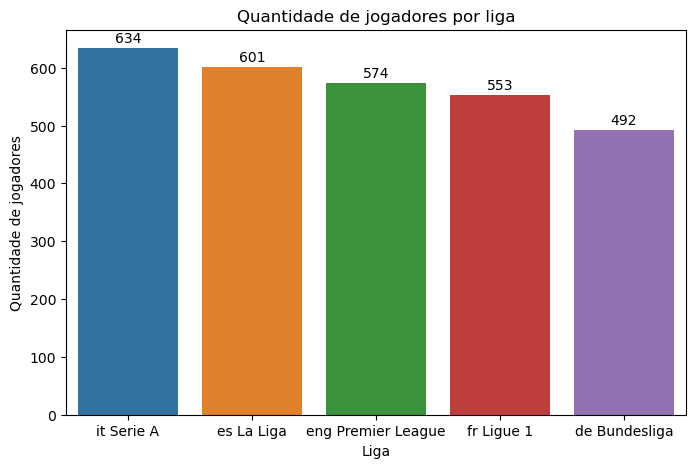


Jogadores por posição: 


,Posição,Quantidade de jogadores
0,DF,859
1,MF,589
2,FW,371
3,"FW,MF",325
4,"MF,FW",230
5,GK,212
6,"DF,MF",110
7,"MF,DF",81
8,"DF,FW",53
9,"FW,DF",24


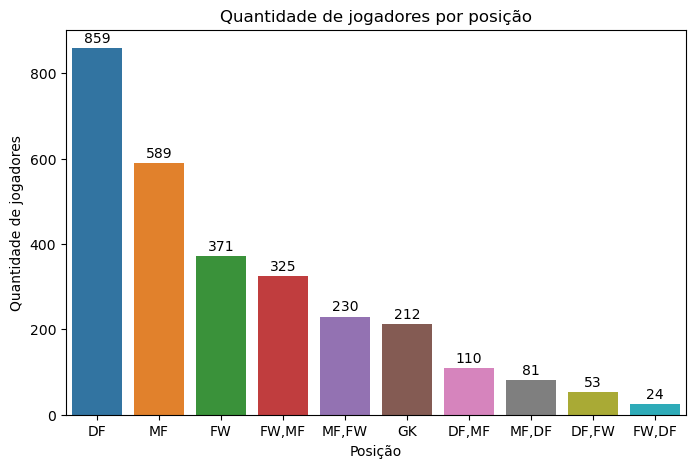

In [5]:
# Verificando quantidade de jogadores por liga
print('\nJogadores por liga: ')
jogadores_por_liga = (df_filtrado['Comp'].value_counts().reset_index())
jogadores_por_liga.columns = ['Liga', 'Quantidade de jogadores']
display(jogadores_por_liga)

# Gráfico para visualização
plt.figure(figsize=(8,5))
ax = sns.barplot(data=jogadores_por_liga, x='Liga', y='Quantidade de jogadores', hue='Liga')
plt.title('Quantidade de jogadores por liga')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.show()


# Verificando quantidade de jogadores por posição
print('\nJogadores por posição: ')
jogadores_por_posição = (df_filtrado['Pos'].value_counts().reset_index())
jogadores_por_posição.columns = ['Posição', 'Quantidade de jogadores']
display(jogadores_por_posição)

# Gráfico para visualização
plt.figure(figsize=(8,5))
ax = sns.barplot(data=jogadores_por_posição, x='Posição', y='Quantidade de jogadores', hue='Posição')
plt.title('Quantidade de jogadores por posição')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)
plt.show()    

In [6]:
# Tratamento de jogadores que atuam em múltiplas posições, levando em conta apenas a posição principal
df_filtrado.loc[:, 'Pos'] = df_filtrado['Pos'].apply(lambda pos: pos.split(',')[0])
print('\nDistribuição de jogadores por posição após tratamento: ')
jogadores_por_posicao_pos_tratamento = (df_filtrado['Pos'].value_counts().reset_index())
jogadores_por_posicao_pos_tratamento


Distribuição de jogadores por posição após tratamento: 


,Pos,count
0,DF,1022
1,MF,900
2,FW,720
3,GK,212


### 🔍 Por que esse tratamento?
Muitos jogadores atuam em múltiplas posições (ex: "FW,MF"). Para simplificar a análise, considerei apenas a posição principal de cada jogador.


### 📊 Resultado do Tratamento

Após o tratamento, a distribuição de jogadores por posição ficou mais clara, eliminando duplicidades e facilitando as análises posteriores.

Se executarmos a célula anterior veremos os graficos após o tratamento dos dados

**Estatísticas ofensivas**

                  Player            Squad                Comp Pos  Gls
1691       Kylian Mbappé      Real Madrid          es La Liga  FW   31
2304       Mohamed Salah        Liverpool  eng Premier League  FW   29
1483  Robert Lewandowski        Barcelona          es La Liga  FW   27
1317          Harry Kane    Bayern Munich       de Bundesliga  FW   26
2201       Mateo Retegui         Atalanta          it Serie A  FW   25
1219      Alexander Isak    Newcastle Utd  eng Premier League  FW   23
1109      Erling Haaland  Manchester City  eng Premier League  FW   22
1093     Serhou Guirassy         Dortmund       de Bundesliga  FW   21
697      Ousmane Dembélé        Paris S-G          fr Ligue 1  FW   21
1060     Mason Greenwood        Marseille          fr Ligue 1  FW   21


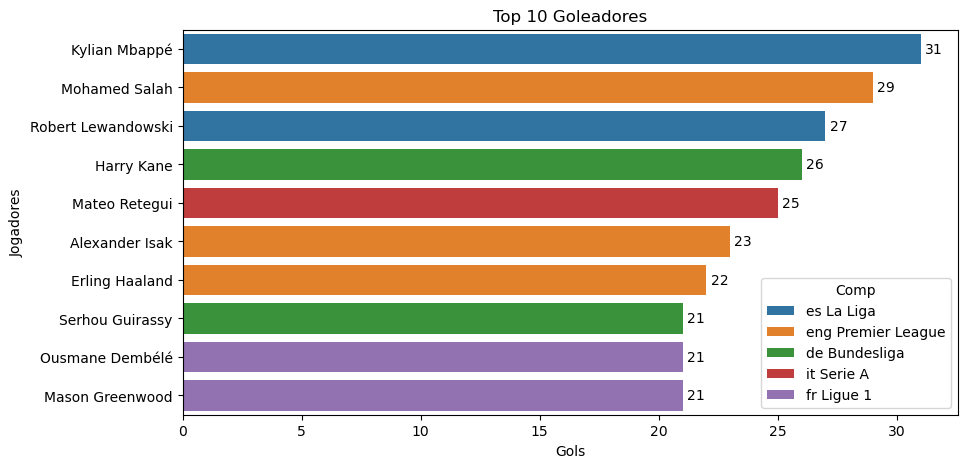

In [7]:
# Top 10 jogadores com mais gols
top_goleadores = df_filtrado.sort_values('Gls', ascending=False).head(10)[
    ['Player', 'Squad', 'Comp', 'Pos', 'Gls']
]
print(top_goleadores)

# Visualizando os dados
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_goleadores, x='Gls', y='Player', hue='Comp')
plt.title('Top 10 Goleadores')
plt.xlabel('Gols')
plt.ylabel('Jogadores')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

**💡 Destaques**
- Kylian Mbappé lidera com 31 gols.
- Premier League domina com 3 jogadores no top 10.
- Guirassy, Dembélé e Greenwood ficaram empatados com 21 gols cada.

               Player            Squad                Comp Pos  Ast
2304    Mohamed Salah        Liverpool  eng Premier League  FW   18
1960    Michael Olise    Bayern Munich       de Bundesliga  FW   15
2792     Lamine Yamal        Barcelona          es La Liga  FW   13
2779    Florian Wirtz       Leverkusen       de Bundesliga  MF   12
1830     Jacob Murphy    Newcastle Utd  eng Premier League  FW   12
829    Anthony Elanga  Nott'ham Forest  eng Premier League  FW   11
1064   Vincenzo Grifo         Freiburg       de Bundesliga  FW   11
2099    Gaëtan Perrin          Auxerre          fr Ligue 1  MF   11
541      Rayan Cherki             Lyon          fr Ligue 1  FW   11
238   Bradley Barcola        Paris S-G          fr Ligue 1  FW   10


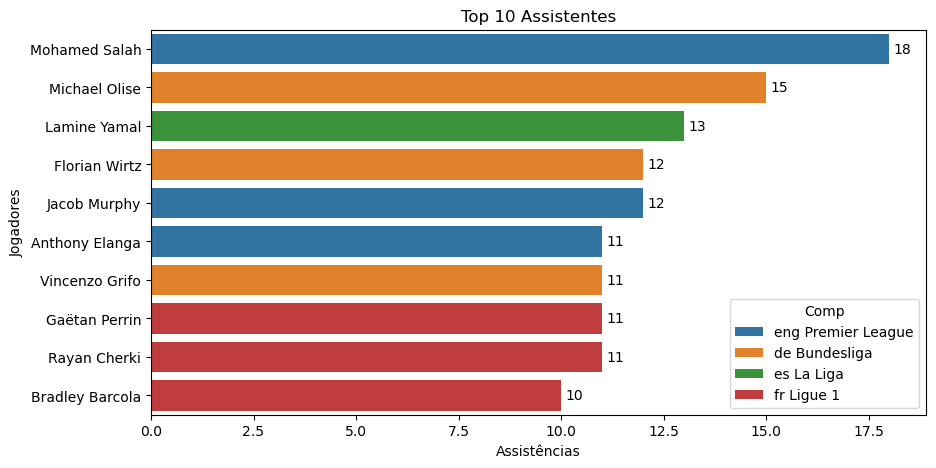

In [8]:
# Top 10 jogadores com mais assistências
top_assistentes = df_filtrado.sort_values('Ast', ascending=False).head(10)[
    ['Player', 'Squad', 'Comp', 'Pos', 'Ast']
]
print(top_assistentes)

# Visualizando os dados
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_assistentes, x='Ast', y='Player', hue='Comp')
plt.title('Top 10 Assistentes')
plt.xlabel('Assistências')
plt.ylabel('Jogadores')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()  

                  Player          Squad                Comp Pos  G+A
2304       Mohamed Salah      Liverpool  eng Premier League  FW   47
1317          Harry Kane  Bayern Munich       de Bundesliga  FW   35
1691       Kylian Mbappé    Real Madrid          es La Liga  FW   34
2201       Mateo Retegui       Atalanta          it Serie A  FW   33
1219      Alexander Isak  Newcastle Utd  eng Premier League  FW   29
1483  Robert Lewandowski      Barcelona          es La Liga  FW   29
1960       Michael Olise  Bayern Munich       de Bundesliga  FW   27
2177            Raphinha      Barcelona          es La Liga  FW   27
697      Ousmane Dembélé      Paris S-G          fr Ligue 1  FW   27
1693        Bryan Mbeumo      Brentford  eng Premier League  FW   27


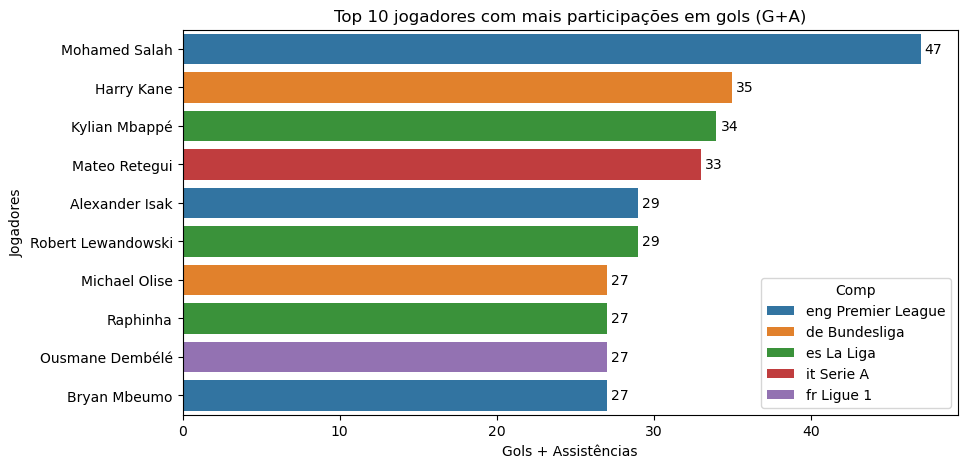

In [9]:
# Top jogadores ofensivos
top_ofensivos = df_filtrado.sort_values('G+A', ascending=False).head(10)[
    ['Player', 'Squad', 'Comp', 'Pos', 'G+A']
]
print(top_ofensivos)

# Visualizando os dados
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_ofensivos, x='G+A', y='Player', hue='Comp')
plt.title('Top 10 jogadores com mais participações em gols (G+A)')
plt.xlabel('Gols + Assistências')
plt.ylabel('Jogadores')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)
plt.show()

*🔍 Análise*

• Esse ranking revela os jogadores mais decisivos da temporada em suas ligas nacionais, somando gols e assistências. 

• Observa-se que Mohamed Salah lidera isolado com 47 participações em gols, seguido por Harry Kane com 35. 


Squad
Liverpool          6.250000
Barcelona          6.107143
Paris S-G          5.642857
Bayern Munich      5.586207
Leverkusen         5.347826
Inter              5.115385
Atlético Madrid    4.958333
Arsenal            4.880000
Newcastle Utd      4.833333
Dortmund           4.464286
Name: G+A, dtype: float64


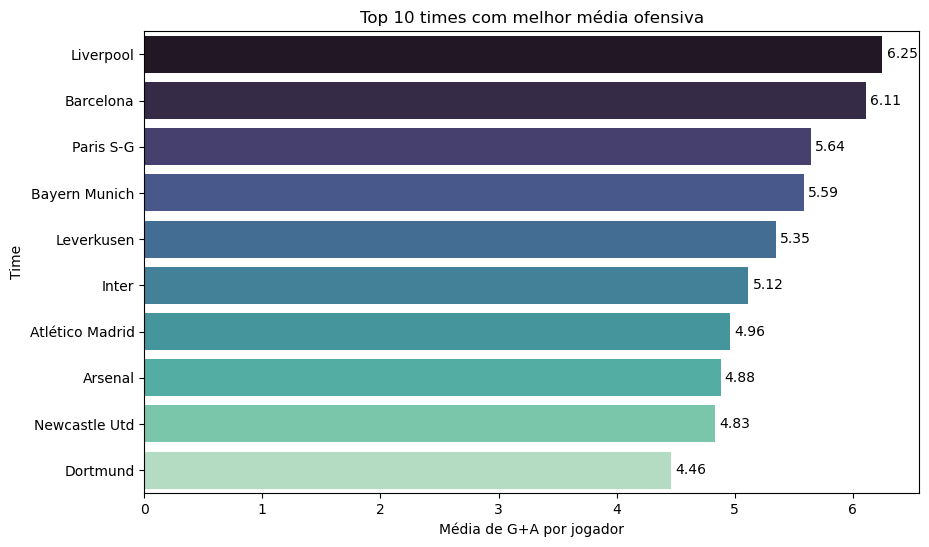

In [10]:
# Times com maior media de participações em gol('G+A')
melhores_times_ofensivos = df_filtrado.groupby('Squad')['G+A'].mean().sort_values(ascending=False).head(10)
print(melhores_times_ofensivos)

# Visualização gráfica
plt.figure(figsize=(10,6))
ax = sns.barplot(x=melhores_times_ofensivos.values, y=melhores_times_ofensivos.index, hue=melhores_times_ofensivos.index, palette='mako')
plt.title('Top 10 times com melhor média ofensiva')
plt.xlabel('Média de G+A por jogador')
plt.ylabel('Time')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.show()

*🔍 Análise*

• Nota-se que Liverpool e Barcelona tiveram as maiores médias de Gols + Assistências por jogador, as 47 participações em gols de Mohamed Salah influência muito para que Liverpool esteja em primeiro no ranking, assim como o trio de ataque do Barcelona que fez uma ótima temporada.

• Percebe-se também que os 4 primeiros times ganharam as suas respectivas ligas nacionais na temporada 24/25,

**Estatísticas defensivas**

                  Player           Squad                Comp Pos  Tkl+Int
962   Idrissa Gana Gueye         Everton  eng Premier League  MF      181
1823        Daniel Muñoz  Crystal Palace  eng Premier League  DF      167
434       Moisés Caicedo         Chelsea  eng Premier League  MF      163
2223    Antonee Robinson          Fulham  eng Premier League  DF      157
1161      Omar El Hilali        Espanyol          es La Liga  DF      157
125       Benjamin André           Lille          fr Ligue 1  MF      151
489              Carmona         Sevilla          es La Liga  DF      151
935      Morten Frendrup           Genoa          it Serie A  MF      149
1685   Noussair Mazraoui  Manchester Utd  eng Premier League  DF      149
2568     Nahuel Tenaglia          Alavés          es La Liga  DF      143


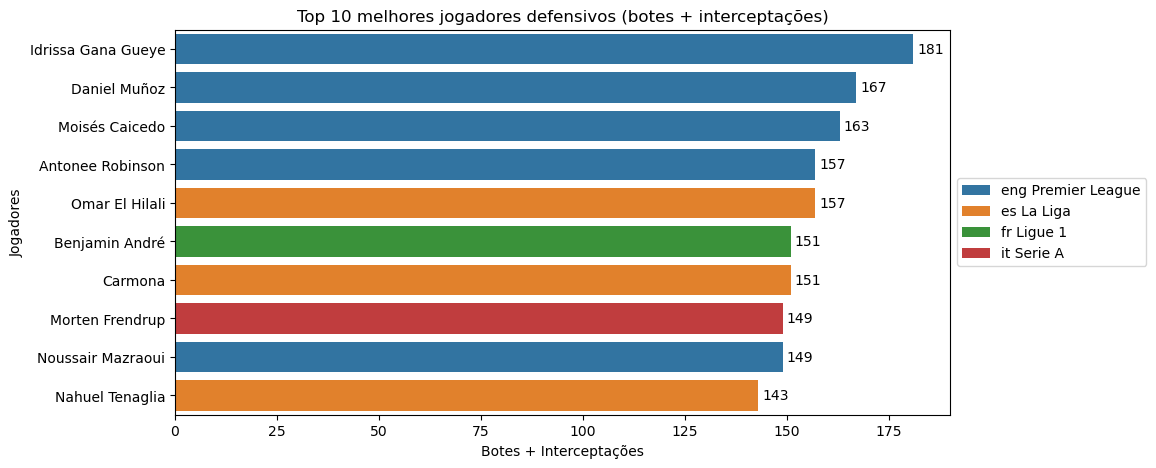

In [11]:
# Top 10 melhores defensores (botes + interceptações) ('Tkl+Int')
top_defensores = df_filtrado.sort_values('Tkl+Int', ascending=False).head(10)[
    ['Player', 'Squad', 'Comp', 'Pos', 'Tkl+Int']
]
print(top_defensores)

# Visualizando os dados gráficamente
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=top_defensores, x='Tkl+Int', y='Player', hue='Comp')
plt.xlabel('Botes + Interceptações')
plt.ylabel('Jogadores')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Top 10 melhores jogadores defensivos (botes + interceptações)')
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.show()

Squad
Nott'ham Forest    44.347826
Everton            41.423077
Liverpool          39.208333
Crystal Palace     37.965517
Manchester Utd     37.903226
Fulham             37.730769
Werder Bremen      37.652174
Leganés            37.115385
Rayo Vallecano     36.923077
Monaco             36.678571
Name: Tkl+Int, dtype: float64


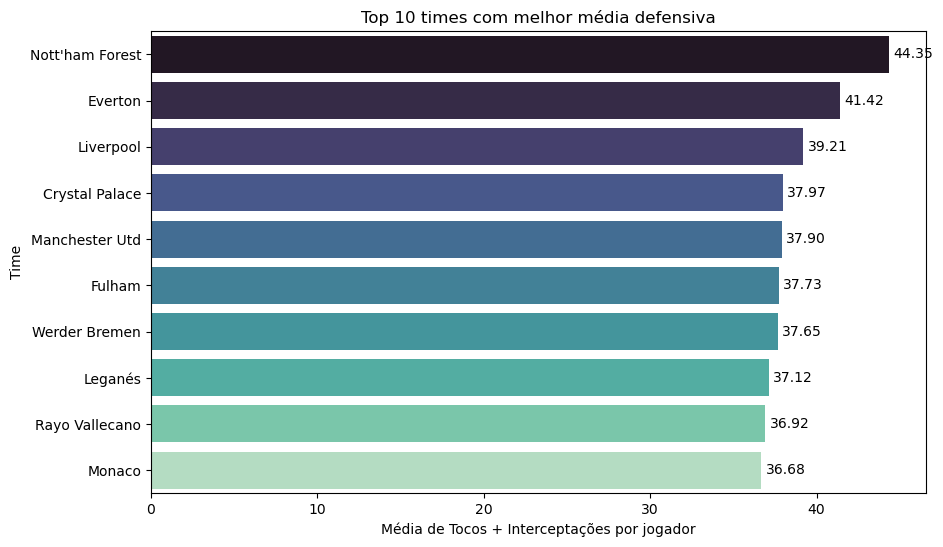

In [12]:
# Times com melhor media defensiva considerando Tocos + Interceptações ('Tkl+Int') por jogador.
melhores_times_defensivos = df_filtrado.groupby('Squad')['Tkl+Int'].mean().sort_values(ascending=False).head(10)
print(melhores_times_defensivos)

# Visualização gráfica
plt.figure(figsize=(10,6))
ax = sns.barplot(x=melhores_times_defensivos.values, y=melhores_times_defensivos.index, hue=melhores_times_defensivos.index, palette='mako')
plt.title('Top 10 times com melhor média defensiva')
plt.xlabel('Média de Tocos + Interceptações por jogador')
plt.ylabel('Time')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)
plt.show()

• O gráfico revela o top 10 melhores times defensivos levando em consideração a média de Tocos + Interceptações por jogador

• O top 6 é formado apenas por times da Premier League, o que evidência a qualidade defensiva da liga.

**Quais as melhores ligas?**

Agora vamos comparar a qualidade técnica de cada liga através das médias de desempenho dos jogadores.

In [13]:
# Liga com melhor qualidade DEFENSIVA
df_filtrado.groupby('Comp')['Tkl+Int'].mean().sort_values(ascending=False)

Comp
eng Premier League    33.806620
es La Liga            30.745424
de Bundesliga         29.949187
fr Ligue 1            29.896926
it Serie A            27.015773
Name: Tkl+Int, dtype: float64

In [14]:
# Liga com melhor qualidade OFENSIVA
df_filtrado.groupby('Comp')['G+A'].mean().sort_values(ascending=False)

Comp
eng Premier League    3.285714
de Bundesliga         3.262195
es La Liga            2.732113
fr Ligue 1            2.707052
it Serie A            2.523659
Name: G+A, dtype: float64

**🔍 O que os números revelam**
- A Premier League se destaca defensivamente e ofensivamente, comprovando a qualidade técnica da competição.
- A Bundesliga tem bons números ofensivos com média de participações em gols próxima a da Premier League.

**Análise dos goleiros**

                      Player          Squad Pos                Comp  Saves
906             Mark Flekken      Brentford  GK  eng Premier League  150.0
972              Joan García       Espanyol  GK          es La Liga  140.0
914             Yahia Fofana         Angers  GK          fr Ligue 1  135.0
1449      Gautier Larsonneur  Saint-Étienne  GK          fr Ligue 1  132.0
1156          Sergio Herrera        Osasuna  GK          es La Liga  131.0
743            Yehvann Diouf          Reims  GK          fr Ligue 1  131.0
1743  Vanja Milinković-Savić         Torino  GK          it Serie A  129.0
874        Wladimiro Falcone          Lecce  GK          it Serie A  125.0
425             Marcin Bułka           Nice  GK          fr Ligue 1  120.0
2172          Aaron Ramsdale    Southampton  GK  eng Premier League  120.0


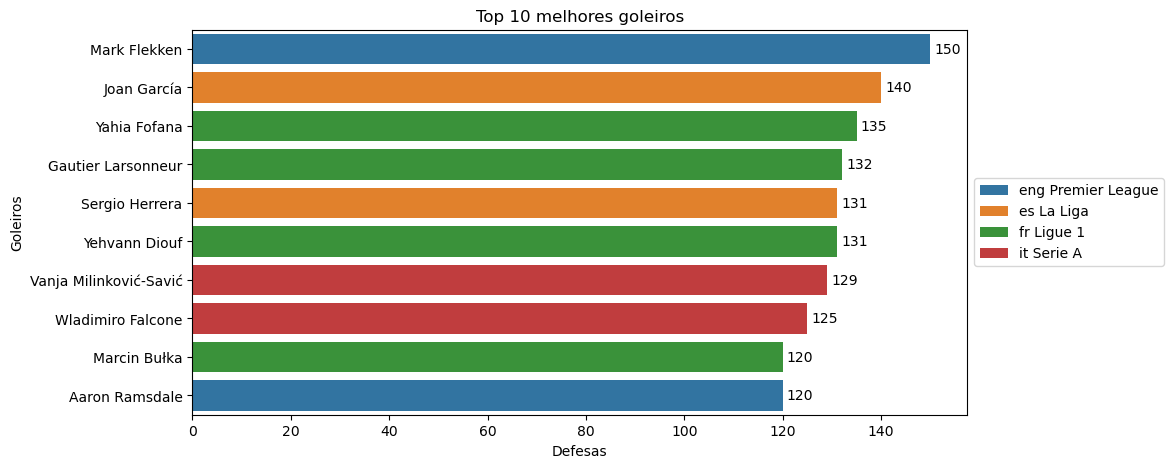

In [15]:
# Top melhores goleiros
top_goleiros = df_filtrado.sort_values('Saves', ascending=False).head(10)[
    ['Player', 'Squad', 'Pos', 'Comp', 'Saves']
]
print(top_goleiros)

plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_goleiros, x='Saves', y='Player', hue='Comp')
plt.xlabel('Defesas')
plt.ylabel('Goleiros')
plt.title('Top 10 melhores goleiros')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%.0f', padding=3)
plt.show()


**Como ficaria um time formado apenas por jogadores que se destacaram em suas posições na temporada?**

**⭐ Montando o Dream Team**

Com base nas estatísticas da temporada, vamos montar um time dos sonhos no esquema 3-5-2:
- **Goleiro:** Melhor em defesas
- **Defensores:** Líderes em botes + interceptações  
- **Meio-campo:** Jogadores com mais passes chave
- **Atacantes:** Maiores participações em gols

In [16]:
# Filtrando jogadores por posição
goleiros = df_filtrado[df_filtrado['Pos'] == 'GK']
defensores = df_filtrado[df_filtrado['Pos'] == 'DF']
meias = df_filtrado[df_filtrado['Pos'] == 'MF']
atacantes = df_filtrado[df_filtrado['Pos'] == 'FW']

In [17]:
# Filtrar o melhor goleiro da temporada ('Saves' defesas)
melhor_goleiro = goleiros.sort_values('Saves', ascending=False).head(1)[
    ['Player', 'Pos', 'Squad', 'Comp']
]
display(melhor_goleiro)

# Filtrar os 3 melhores defensores ('Tkl+Int' tocos e interceptações)
melhores_defensores = defensores.sort_values('Tkl+Int', ascending=False).head(3)[
    ['Player', 'Pos', 'Squad', 'Comp']
]
display(melhores_defensores)

# Filtrar os 5 melhores meias ('KP' key passes: passes chaves)
melhores_meias = meias.sort_values('KP', ascending=False).head(5)[
    ['Player', 'Pos', 'Squad', 'Comp']
]
display(melhores_meias)

# Filtrar os 2 melhores atacantes (Participações em gols ('G+A'))
melhores_atacantes = atacantes.sort_values('G+A', ascending=False).head(2)[
    ['Player', 'Pos', 'Squad', 'Comp']
]
display(melhores_atacantes)


,Player,Pos,Squad,Comp
906,Mark Flekken,GK,Brentford,eng Premier League


,Player,Pos,Squad,Comp
1823,Daniel Muñoz,DF,Crystal Palace,eng Premier League
1161,Omar El Hilali,DF,Espanyol,es La Liga
2223,Antonee Robinson,DF,Fulham,eng Premier League


,Player,Pos,Squad,Comp
200,Alex Baena,MF,Villarreal,es La Liga
891,Bruno Fernandes,MF,Manchester Utd,eng Premier League
2033,Cole Palmer,MF,Chelsea,eng Premier League
1356,Joshua Kimmich,MF,Bayern Munich,de Bundesliga
896,Enzo Fernández,MF,Chelsea,eng Premier League


,Player,Pos,Squad,Comp
2304,Mohamed Salah,FW,Liverpool,eng Premier League
1317,Harry Kane,FW,Bayern Munich,de Bundesliga


In [18]:
# Concatenar DataFrames
dream_team = pd.concat([melhor_goleiro, melhores_defensores, melhores_meias, melhores_atacantes])

# Visualizar dream team (FORMAÇÃO 3-5-2)
print('\n⚽ DREAM TEAM 2024/25 ⚽')
display(dream_team)


⚽ DREAM TEAM 2024/25 ⚽


,Player,Pos,Squad,Comp
906,Mark Flekken,GK,Brentford,eng Premier League
1823,Daniel Muñoz,DF,Crystal Palace,eng Premier League
1161,Omar El Hilali,DF,Espanyol,es La Liga
2223,Antonee Robinson,DF,Fulham,eng Premier League
200,Alex Baena,MF,Villarreal,es La Liga
891,Bruno Fernandes,MF,Manchester Utd,eng Premier League
2033,Cole Palmer,MF,Chelsea,eng Premier League
1356,Joshua Kimmich,MF,Bayern Munich,de Bundesliga
896,Enzo Fernández,MF,Chelsea,eng Premier League
2304,Mohamed Salah,FW,Liverpool,eng Premier League


**O Dream Team montado representa os jogadores com melhor desempenho estatístico em suas posições, independente da liga em que atuam.**

**Representação Tática do Dream Team na formação 3-5-2**

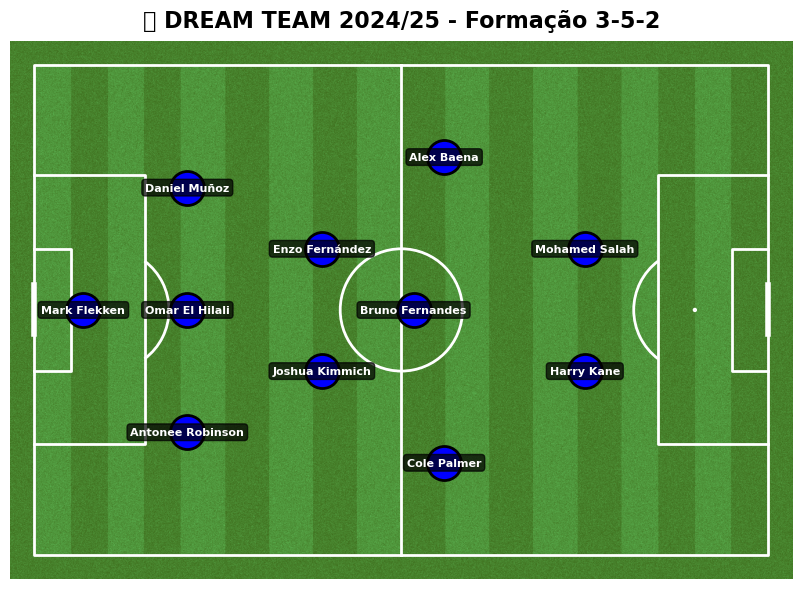

In [19]:
# Criar o campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white', stripe=True)
fig, ax = pitch.draw(figsize=(10, 6))

# Posições no campo (x, y) - ajuste conforme formação 3-5-2
# x: 0-120 (comprimento), y: 0-80 (largura)

posicoes = {
    # Goleiro
    'GK': (8, 40),
    
    # Defensores (3)
    'DF1': (25, 20),
    'DF2': (25, 40),
    'DF3': (25, 60),
    
    # Meio-campo (5)
    'MF1': (67, 15),
    'MF2': (47, 30),
    'MF3': (62, 40),
    'MF4': (67, 65),
    'MF5': (47, 50),
    
    # Atacantes (2)
    'FW1': (90, 30),
    'FW2': (90, 50)
}

# Nomes dos jogadores do seu Dream Team (pega do seu dataframe)
jogadores = {
    'GK': dream_team.iloc[0]['Player'],
    'DF1': dream_team.iloc[1]['Player'],
    'DF2': dream_team.iloc[2]['Player'],
    'DF3': dream_team.iloc[3]['Player'],
    'MF1': dream_team.iloc[4]['Player'],
    'MF2': dream_team.iloc[8]['Player'],
    'MF3': dream_team.iloc[5]['Player'],
    'MF4': dream_team.iloc[6]['Player'],
    'MF5': dream_team.iloc[7]['Player'],
    'FW1': dream_team.iloc[9]['Player'],
    'FW2': dream_team.iloc[10]['Player']
}

# Plotar jogadores
for pos, (x, y) in posicoes.items():
    # Círculo pro jogador
    pitch.scatter(x, y, s=600, c='blue', edgecolors='black', linewidth=2, ax=ax, zorder=3)
    
    # Nome do jogador
    ax.text(x, y, jogadores[pos], ha='center', va='center', 
            fontsize=8, fontweight='bold', color='white', zorder=4,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.7))

plt.title('⚽ DREAM TEAM 2024/25 - Formação 3-5-2', fontsize=16, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()

## ⚽ Dream Team - Formação Tática

Utilizando a biblioteca **mplsoccer**, montei uma visualização tática do Dream Team no esquema 3-5-2, posicionando cada jogador de acordo com sua função em campo.

Essa representação visual facilita a compreensão da distribuição de talentos e do equilíbrio tático do time ideal da temporada.

## 🏆 Conclusões Finais

**Através desta análise, identificamos os principais destaques das ligas nacionais europeias na temporada 24/25**

**🏆 Melhor Liga:** Premier League, lidera ofensivamente e defensivamente com média superior às demais ligas nacionais.                              
**🧤 Goleiro Destaque:** Mark Flekken, goleiro do Brentford foi o destaque com 150 defesas.                                   
**⭐. Jogador Destaque:** Mohamed Salah, levando em consideração apenas os jogos pelas ligas nacionais, Salah foi o maior destaque da temporada com incríveis 47 participações em gols (G+A).         



### Principais Descobertas:

**🏆 Melhor Liga:** Premier League - lidera ofensivamente e defensivamente com médias superiores às demais competições.

**🧤 Goleiro Destaque:** Mark Flekken (Brentford) - 150 defesas na temporada.

**⭐ Jogador Destaque:** Mohamed Salah (Liverpool) - 47 participações em gols (G+A), o maior destaque individual da temporada nas ligas nacionais.